<h1> Install Libraries </h1>

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: joblib>=0.11 in c:\users\dell\appdata\local\programs\python\python39\lib\site-packages (from scikit-learn) (1.0.1)



You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


___
<h1> Import Libraries </h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from plotly.subplots import make_subplots
import plotly.express as px
from ipywidgets import fixed

---
<h1> Reading the data </h1>

In [6]:
data = pd.read_csv('Human_Resources.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

___

<h1>🧹 Data Cleaning</h1>

<p>In this section we'll see if there any missing data or other errors that could happen to avoid further problems.<br>
Beause this data is from kaggle we probably won't get much trouble in this process. </p>

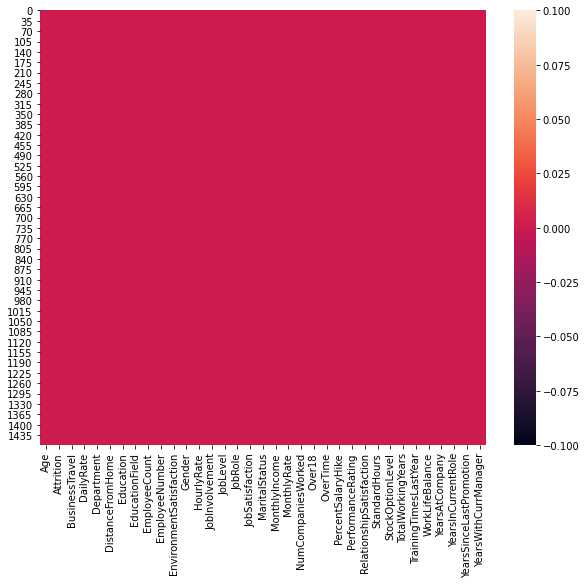

In [5]:
plt.figure(figsize = (10,8))
sns.heatmap(data.isnull());

In [6]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In the attributes **"Attrition"** and **"OverTime"** we see that is an "object" that mean this columns is a **string**, so **we'll change** that attribute using the follow code. 

In [7]:
data.Attrition = data.Attrition.apply(lambda x: 1 if x == 'Yes' else 0)
data.OverTime = data.OverTime.apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


___
<h1>🕵️ Descriptive Analysis </h1>

In this section we'll do an descritpive analysis on our data following the steps:

<ul>
<li>Plot Histograms of the attributes to give us an overview of the data.</li>
<li>Plot an correlation graphic of the attributes.</li>
</ul>

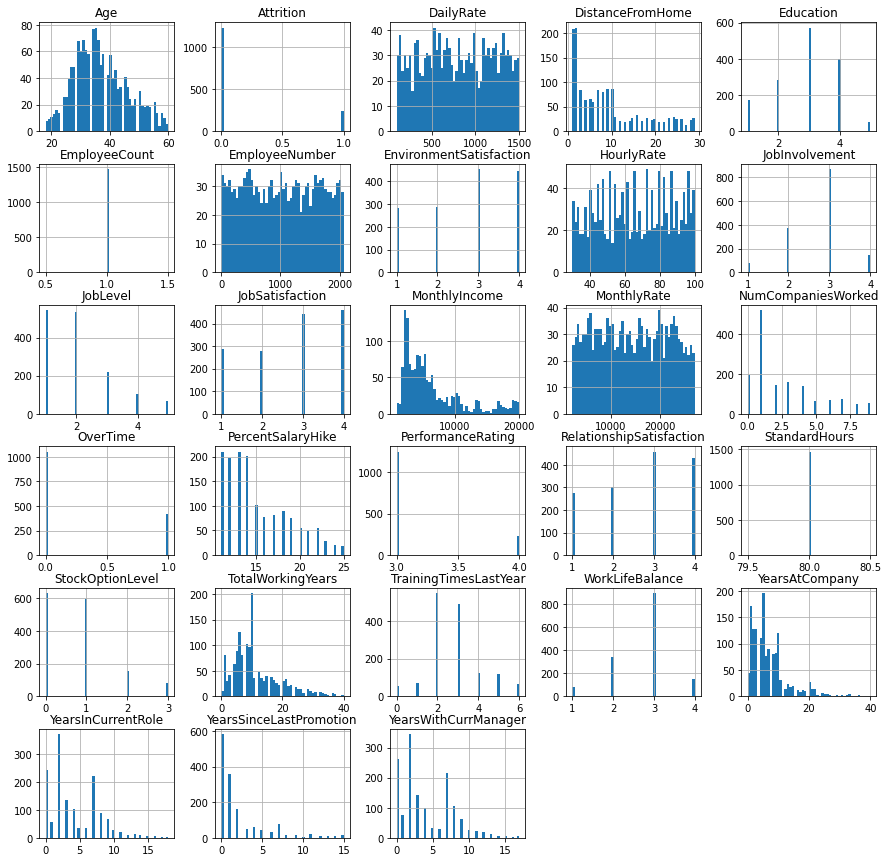

In [9]:
data.hist(bins = 50, figsize = (15,15));

In this graphics we see that the columns **"EmployeeCount"** and **"StandardHours" doesn't show much relevance** to our analysis so **we'll remove** this attributes in the next code

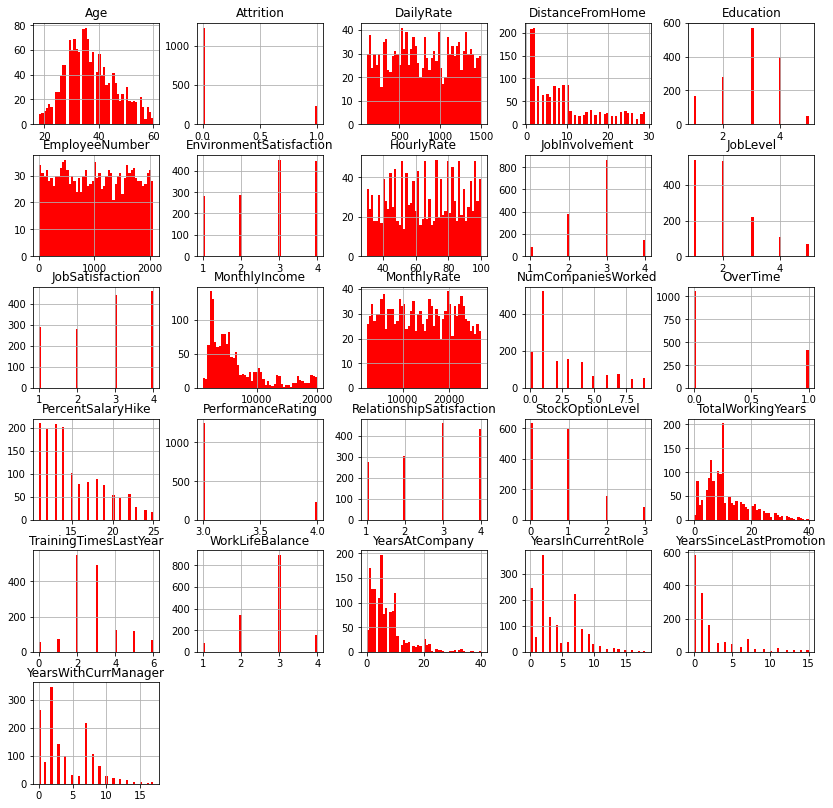

In [10]:
data.drop(['StandardHours','EmployeeCount'], inplace = True, axis =1)
data.hist(bins = 50, figsize = (14,14), color = 'r');

___
<h2>👩‍💻 Who Stay who Leave </h2>

In this section we'll do an descriptive analysis of the two groups of people, the people who left the company (Attrition = 1) with the people who stay (Attrition = 0), generating the follow graphics:

<ul>
<li>Plotting a dinamic histogram of the attributes.</li>
<li>Plotting a dinamic boxplot of the attributes.</li>
</ul>

In [41]:
attrib_selector = widgets.Dropdown(
    options = data.columns ,
    value= data.columns[0],
    description='Atributes:',
    disabled=False)

def graphic (data, attrib_selector):
    fig = px.histogram(data, x = attrib_selector, color = 'Attrition', barmode = 'group')
    fig.show()
    
widgets.interactive(graphic, data = fixed(data), attrib_selector = attrib_selector)

interactive(children=(Dropdown(description='Atributes:', options=('Age', 'Attrition', 'BusinessTravel', 'Daily…

In [42]:
x_selector = widgets.Dropdown(
    options = data.columns ,
    value= data.columns[0],
    description='X atribute:',
    disabled=False)

y_selector = widgets.Dropdown(
    options = data.columns ,
    value= data.columns[0],
    description='Y atribute:',
    disabled=False)

def graphic (data, x_selector, y_selector):
    fig = px.box(data, x = x_selector, y = y_selector, color = 'Attrition')
    fig.show()
    
widgets.interactive(graphic, data = fixed(data), x_selector = x_selector, y_selector = y_selector)

interactive(children=(Dropdown(description='X atribute:', options=('Age', 'Attrition', 'BusinessTravel', 'Dail…

<h2>📊💻 Superficial conclusions:</h2> 

During this analysis we can take some conclusions about the people who left:

<ul>
<li>The have the lowest monthly icome (2k).</li>
<li>Are in the lowest job level (1).</li>
<li>Are probably in his first job.</li>
<li>They left in the first year of the job.</li>
<li>They have bad perfomance.</li>
</ul>

___
<h1>👩‍💻 Data Pre-processing </h1> 

Before we use the Machine Learning models we have to make some data preparations following the next steps:  
<ol>
<li>Make a sample using 80% of the data.</li>
<li>Separate the data atributes between categorical and numerical.</li>
<li>We transform the categorical data into numbers using the library "One Hot Encoder".</li>
<li>Concatenate the both separate data.</li>
<li>Transform the sampled data in a number between 0 and 1.</li>
</ol>

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
onehotencoder = OneHotEncoder()
scaler = MinMaxScaler()

In [44]:
sample_data = data.iloc[0:1176,:]

In [16]:
cat_data = sample_data.select_dtypes('object')

In [17]:
x_cat = sample_data.select_dtypes('object')
x_cat = onehotencoder.fit_transform(x_cat).toarray()
x_cat = pd.DataFrame(x_cat)

In [18]:
y_cat = sample_data.select_dtypes('int64').drop(columns=['Attrition'])

In [19]:
x_all = pd.concat([x_cat.reset_index(drop=True), y_cat.reset_index(drop=True)], axis = 1)

In [20]:
X = scaler.fit_transform(x_all)
y = sample_data.Attrition

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [34]:
x_test.shape

(294, 52)

___
<h1>🤖 Machine Learning Models</h1>

In this section we'll explore some machine models in or pre-processed data to select witch model has the best performance.  
Because this is a case study I'll use the Machine learning models that I have more confidence and understanding, feel free to use other models that you prefer. 😊

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

___
<h3>Logistic Regression</h3>

In [21]:
logistic = LogisticRegression()

In [25]:
def logistic_regression():
    
    np.random.seed(42)
    
    # Split the data in train and test
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    # Fit the model
    logistic.fit(x_train, y_train);
    
    # Predict using the x_test data
    y_pred = logistic.predict(x_test)
    
    # Measure de accuracy
    accuracy = accuracy_score(y_test, y_pred)*100
    print("The accuracy score is " + str(accuracy.round(2)))
    
    # Metrics
    precision_score(y_test, y_pred)
    recall_score(y_test, y_pred)
    f1_score(y_test, y_pred)
    print('')
    print(classification_report(y_test, y_pred))
    
    # Plot a confusion matrix
    matrix = confusion_matrix(y_test, y_pred);
    return sns.heatmap(matrix, annot=True);

The accuracy score is 89.46

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       249
           1       0.85      0.38      0.52        45

    accuracy                           0.89       294
   macro avg       0.87      0.68      0.73       294
weighted avg       0.89      0.89      0.88       294



<AxesSubplot:>

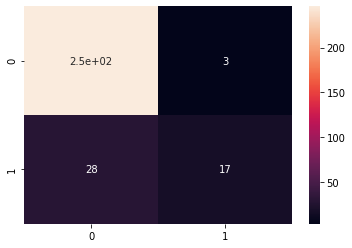

In [26]:
logistic_regression()

Because the data is imbalanced we see some problems to classify the employees that leave the job, we see clearly on the KPI metrics **(precision, recall, f1-score, support)**

To understand better about the metrics used: [Medium article precision, recall, f1-score, support](https://vitorborbarodrigues.medium.com/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c)

___
<h3>Random Forest</h3>

In [27]:
forest = RandomForestClassifier()

In [28]:
def forest_classifier():
    
    np.random.seed(42)
    
    # Split the data in train and test
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    # Fit the model
    forest.fit(x_train, y_train);
    
    # Predict using the x_test data
    y_pred = forest.predict(x_test)
    
    # Measure de accuracy
    accuracy = accuracy_score(y_test, y_pred)*100
    print("The accuracy score is " + str(accuracy.round(2)))
    
    # Metrics
    precision_score(y_test, y_pred)
    recall_score(y_test, y_pred)
    f1_score(y_test, y_pred)
    print('')
    print(classification_report(y_test, y_pred))
    
    # Plot a confusion matrix
    matrix = confusion_matrix(y_test, y_pred);
    return sns.heatmap(matrix, annot=True);

The accuracy score is 86.73

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       249
           1       0.88      0.16      0.26        45

    accuracy                           0.87       294
   macro avg       0.87      0.58      0.60       294
weighted avg       0.87      0.87      0.83       294



<AxesSubplot:>

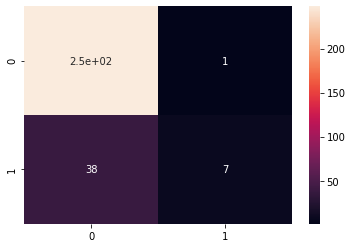

In [29]:
forest_classifier()

We see the performance of this algorithm is worse than the logistic regression, so we'll choose the first option to apply in our future data 

___
<h1>🤖 Machine Learning Models</h1>

In this section we'll explore some machine models in or pre-processed data to select witch model has the best performance.  
Because this is a case study I'll use the Machine learning models that I have more confidence and understanding, feel free to use other models that you prefer. 😊

In [53]:
new_data = data.loc[1176:len(data), :]

In [52]:
def probability_test(data):
    
    # Seed
    np.random.seed(42)
    
    # Select the data 
    new_data = data.loc[1176:len(data), :]
    
    # Separate the categorical data 
    x_cat = new_data.select_dtypes('object')
    x_cat = onehotencoder.fit_transform(x_cat).toarray()
    x_cat = pd.DataFrame(x_cat)
    
    # Separate the numerical data 
    y_cat = new_data.select_dtypes('int64').drop(columns=['Attrition'])
    
    # Concatenate the data
    x_all = pd.concat([x_cat.reset_index(drop=True), y_cat.reset_index(drop=True)], axis = 1)
    x_all = x_all.reindex(labels=x_all.columns,axis=1)
    
    # Transform the data
    X = scaler.fit_transform(x_all)
    y = new_data['Attrition']

    # Separate between train and test
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    # Fit the data
    logistic.fit(x_train, y_train);
    
    # Data prediction
    y_pred = logistic.predict(x_test)
    prob_value = logistic.predict_proba(X)[:,1]
 
    return prob_value

In [80]:
def predict_data(data):
    
    new_data = data.loc[1176:len(data), :]
    support = probability_test(data)
    support_dict = {'ProbabilityToLeave(%)': support.tolist()}
    df_support_dict = pd.DataFrame(support_dict)
    df_support_dict['ProbabilityToLeave(%)'] = df_support_dict['ProbabilityToLeave(%)'].apply(lambda x: x*100).round(2)
    
    new_data_df = pd.concat([new_data.reset_index(drop=True), df_support_dict.reset_index(drop=True)], axis = 1)
    
    return new_data_df

In [82]:
predict_data(data)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProbabilityToLeave(%)
0,49,0,Travel_Rarely,301,Research & Development,22,4,Other,1,1655,...,80,2,27,2,3,4,2,1,2,1.39
1,50,0,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,1656,...,80,3,19,3,3,14,11,1,11,1.50
2,20,0,Travel_Rarely,1141,Sales,2,3,Medical,1,1657,...,80,0,2,3,3,2,2,2,2,11.76
3,34,0,Travel_Rarely,1130,Research & Development,3,3,Life Sciences,1,1658,...,80,1,11,2,3,11,8,7,9,1.37
4,36,0,Travel_Rarely,311,Research & Development,7,3,Life Sciences,1,1659,...,80,0,15,4,3,4,3,1,3,11.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,13.91
290,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,2.37
291,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,39.24
292,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,12.73


___
<h1>👨‍💻 Conclusion </h1>

Because this is a study case, my goal is to show one possibility that we can do using this data, but it needed more research, studies and data to improve this model to make a fair and better prediction. 

The downsides of this study is that I use only two ML algorithms and I didn't make a better exploration of the data. 